<a href="https://colab.research.google.com/github/bahadures/OIL_Spill_Accident-data/blob/master/Copy_of_Oil_Accident_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/database.csv')

In [ ]:
df.head(2)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008


In [ ]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [ ]:
print('The shape of the dataframe is {}'.format(df.shape))

The shape of the dataframe is (2795, 48)


In [ ]:
#detecting the null values
for columns in df:
  print("{} has {}".format(columns, df[columns].isnull().sum()))

Report Number has 0
Supplemental Number has 0
Accident Year has 0
Accident Date/Time has 0
Operator ID has 0
Operator Name has 0
Pipeline/Facility Name has 121
Pipeline Location has 0
Pipeline Type has 18
Liquid Type has 0
Liquid Subtype has 1446
Liquid Name has 2573
Accident City has 315
Accident County has 75
Accident State has 12
Accident Latitude has 0
Accident Longitude has 0
Cause Category has 0
Cause Subcategory has 0
Unintentional Release (Barrels) has 0
Intentional Release (Barrels) has 1586
Liquid Recovery (Barrels) has 0
Net Loss (Barrels) has 0
Liquid Ignition has 0
Liquid Explosion has 0
Pipeline Shutdown has 212
Shutdown Date/Time has 1405
Restart Date/Time has 1454
Public Evacuations has 457
Operator Employee Injuries has 2783
Operator Contractor Injuries has 2783
Emergency Responder Injuries has 2783
Other Injuries has 2783
Public Injuries has 2783
All Injuries has 2783
Operator Employee Fatalities has 2787
Operator Contractor Fatalities has 2787
Emergency Responder Fat

In [ ]:
#Pipeline/Facility Name
df['Pipeline/Facility Name'] = df['Pipeline/Facility Name'].fillna(df['Pipeline/Facility Name'].median())

TypeError: ignored

In [ ]:
#showing the columns having null values greater than 500
for columns in df:
 if df[columns].isnull().sum() > 500:
   print(columns)

Liquid Subtype
Liquid Name
Intentional Release (Barrels)
Shutdown Date/Time
Restart Date/Time
Operator Employee Injuries
Operator Contractor Injuries
Emergency Responder Injuries
Other Injuries
Public Injuries
All Injuries
Operator Employee Fatalities
Operator Contractor Fatalities
Emergency Responder Fatalities
Other Fatalities
Public Fatalities
All Fatalities


In [ ]:
#showing the columns having null values greater than 500
for columns in df:
 if df[columns].isnull().sum() > 500:
   df.drop([columns], axis = 1, inplace = True)

In [ ]:
df.shape #getting the new shape

(2795, 31)

In [ ]:
#for getting the number of unique values for all the columns in the dataset
for columns in df:
  print("The unique values in the {} are {}".format(columns, df[columns].nunique()))

The unique values in the Report Number are 2795
The unique values in the Supplemental Number are 2795
The unique values in the Accident Year are 8
The unique values in the Accident Date/Time are 2777
The unique values in the Operator ID are 213
The unique values in the Operator Name are 229
The unique values in the Pipeline/Facility Name are 1977
The unique values in the Pipeline Location are 2
The unique values in the Pipeline Type are 4
The unique values in the Liquid Type are 5
The unique values in the Accident City are 1027
The unique values in the Accident County are 678
The unique values in the Accident State are 46
The unique values in the Accident Latitude are 2552
The unique values in the Accident Longitude are 2557
The unique values in the Cause Category are 7
The unique values in the Cause Subcategory are 38
The unique values in the Unintentional Release (Barrels) are 697
The unique values in the Liquid Recovery (Barrels) are 539
The unique values in the Net Loss (Barrels) a

In [ ]:
#showing the columns having null values greater than 500
for columns in df:
 if df[columns].isnull().sum() > 100:
   df.drop([columns], axis = 1, inplace = True)

In [ ]:
df.head(2)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident County,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,...,21.0,NO,NO,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,CUMBERLAND,...,0.0,NO,NO,4000.0,8.0,0.0,0.0,0.0,0.0,4008


In [ ]:
df.shape

(2795, 27)

In [ ]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident County',
       'Accident State', 'Accident Latitude', 'Accident Longitude',
       'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs'],
      dtype='object')

In [ ]:
df['Pipeline Type'].unique()

array(['ABOVEGROUND', 'UNDERGROUND', 'TANK', nan, 'TRANSITION AREA'],
      dtype=object)

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.shape

(2700, 27)

In [ ]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident County',
       'Accident State', 'Accident Latitude', 'Accident Longitude',
       'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs'],
      dtype='object')

In [ ]:
#checking the datatype of columns
for columns in df:
  print("the {} has {}".format(columns, df.columns.dtype))

the Report Number has object
the Supplemental Number has object
the Accident Year has object
the Accident Date/Time has object
the Operator ID has object
the Operator Name has object
the Pipeline Location has object
the Pipeline Type has object
the Liquid Type has object
the Accident County has object
the Accident State has object
the Accident Latitude has object
the Accident Longitude has object
the Cause Category has object
the Cause Subcategory has object
the Unintentional Release (Barrels) has object
the Liquid Recovery (Barrels) has object
the Net Loss (Barrels) has object
the Liquid Ignition has object
the Liquid Explosion has object
the Property Damage Costs has object
the Lost Commodity Costs has object
the Public/Private Property Damage Costs has object
the Emergency Response Costs has object
the Environmental Remediation Costs has object
the Other Costs has object
the All Costs has object


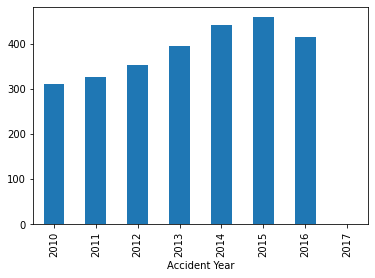

In [ ]:
df.groupby('Accident Year')['Report Number'].count().plot(kind = 'bar')

Observation: Year 2015 reported the maximum number of accidents

In [ ]:
df.head(2)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Accident County,...,Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,...,21.0,NO,NO,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,CUMBERLAND,...,0.0,NO,NO,4000.0,8.0,0.0,0.0,0.0,0.0,4008


In [ ]:
df['Accident Date/Time'] =  pd.to_datetime(df['Accident Date/Time'])

In [ ]:
for columns in df:
  print("the {} has {}".format(columns, df.columns.dtype))

the Report Number has object
the Supplemental Number has object
the Accident Year has object
the Accident Date/Time has object
the Operator ID has object
the Operator Name has object
the Pipeline Location has object
the Pipeline Type has object
the Liquid Type has object
the Accident County has object
the Accident State has object
the Accident Latitude has object
the Accident Longitude has object
the Cause Category has object
the Cause Subcategory has object
the Unintentional Release (Barrels) has object
the Liquid Recovery (Barrels) has object
the Net Loss (Barrels) has object
the Liquid Ignition has object
the Liquid Explosion has object
the Property Damage Costs has object
the Lost Commodity Costs has object
the Public/Private Property Damage Costs has object
the Emergency Response Costs has object
the Environmental Remediation Costs has object
the Other Costs has object
the All Costs has object


In [ ]:
df['Operator Name'].nunique()

224

In [ ]:
df['Pipeline Location'].nunique()

1

In [ ]:
for columns in df:
  print("The unique values in the {} are {}".format(columns, df[columns].nunique()))

The unique values in the Report Number are 2700
The unique values in the Supplemental Number are 2700
The unique values in the Accident Year are 8
The unique values in the Accident Date/Time are 2684
The unique values in the Operator ID are 209
The unique values in the Operator Name are 224
The unique values in the Pipeline Location are 1
The unique values in the Pipeline Type are 4
The unique values in the Liquid Type are 5
The unique values in the Accident County are 677
The unique values in the Accident State are 45
The unique values in the Accident Latitude are 2467
The unique values in the Accident Longitude are 2470
The unique values in the Cause Category are 7
The unique values in the Cause Subcategory are 38
The unique values in the Unintentional Release (Barrels) are 683
The unique values in the Liquid Recovery (Barrels) are 533
The unique values in the Net Loss (Barrels) are 433
The unique values in the Liquid Ignition are 2
The unique values in the Liquid Explosion are 2
The

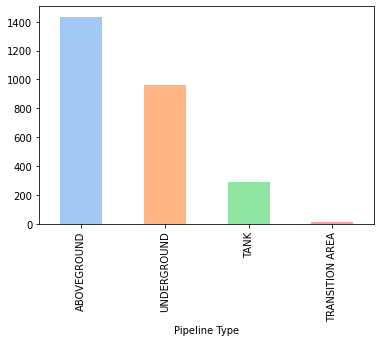

In [ ]:
df.groupby('Pipeline Type')['Report Number'].count().sort_values(ascending=False).plot(kind = 'bar',color=sns.color_palette('pastel'))

Above ground has the highest number of reported accidents while theTransition area has the lowest one.

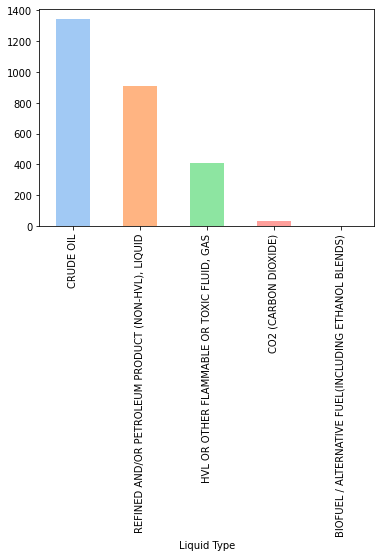

In [ ]:
df.groupby('Liquid Type')['Report Number'].count().sort_values(ascending=False).plot(kind = 'bar', color=sns.color_palette('pastel'))

Crude oil has the hieghest number of accidents while Biofuel has the lowest one

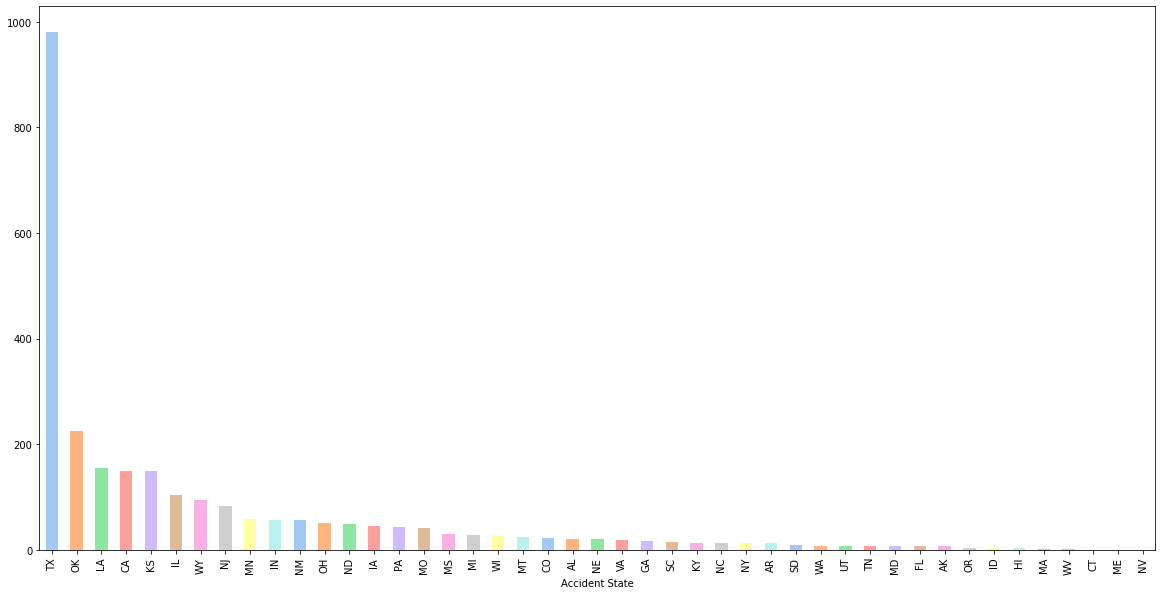

In [ ]:
df.groupby('Accident State')['Report Number'].count().sort_values(ascending=False).plot(kind = 'bar', figsize = (20, 10),color=sns.color_palette('pastel'))

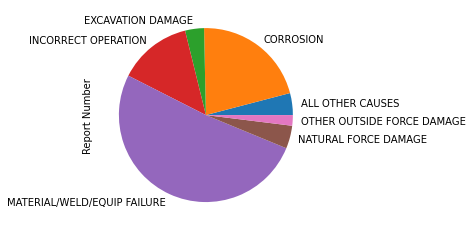

In [ ]:
df.groupby('Cause Category')['Report Number'].count().plot(kind = 'pie')

Material/Weld/Equipment Failure has the main cause of the accidents 

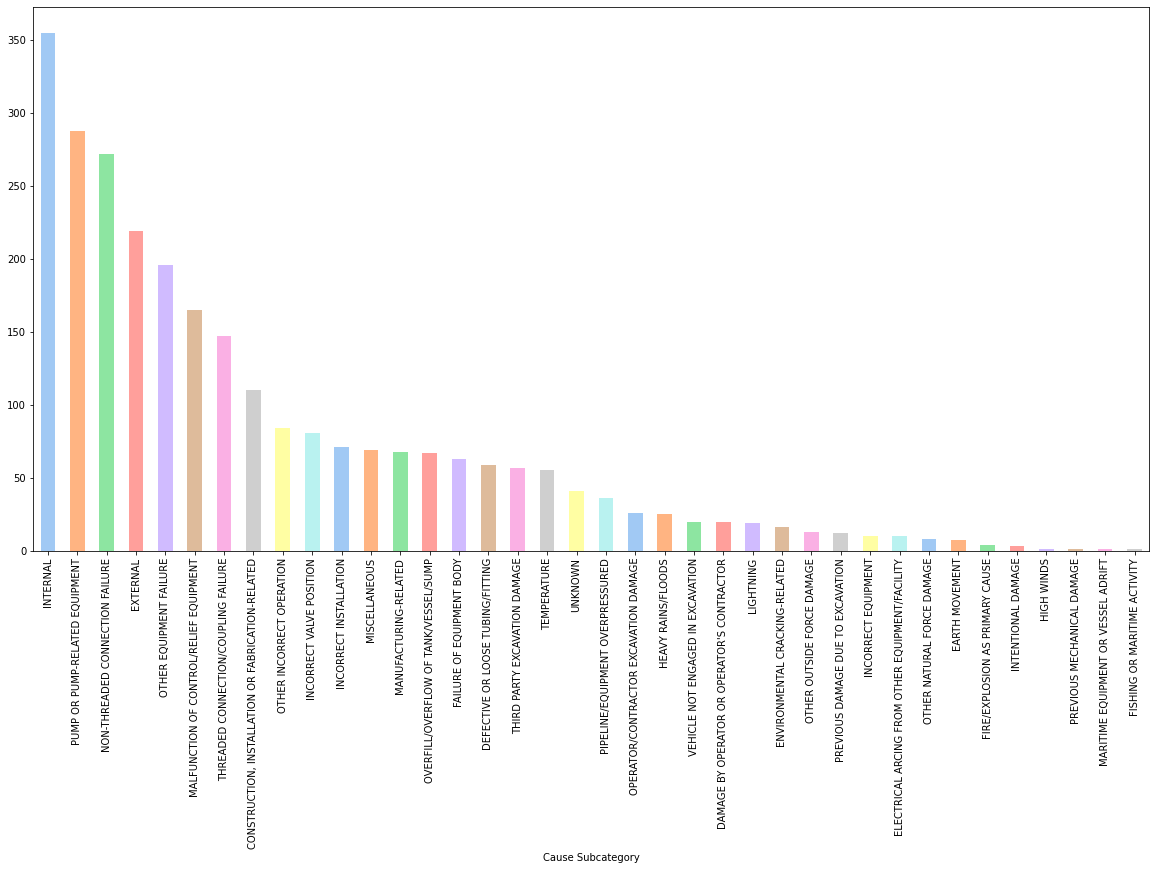

In [ ]:
df.groupby('Cause Subcategory')['Report Number'].count().sort_values(ascending=False).plot(kind = 'bar', figsize = (20, 10), color=sns.color_palette('pastel'))

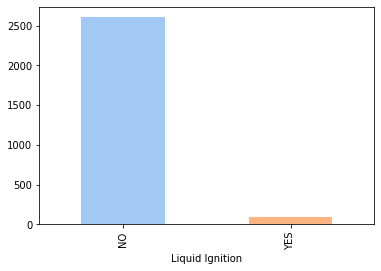

In [ ]:
df.groupby('Liquid Ignition')['Report Number'].count().plot(kind = 'bar', color=sns.color_palette('pastel'))

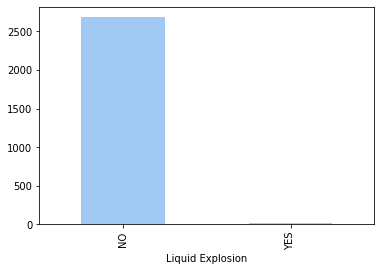

In [ ]:
#Liquid Explosion
df.groupby('Liquid Explosion')['Report Number'].count().plot(kind = 'bar', color=sns.color_palette('pastel'))